<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/eii_u1_e_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

H0: Si una persona tiene un diagnóstico de esquizofrenia, es probable que también presente trastorno bipolar 



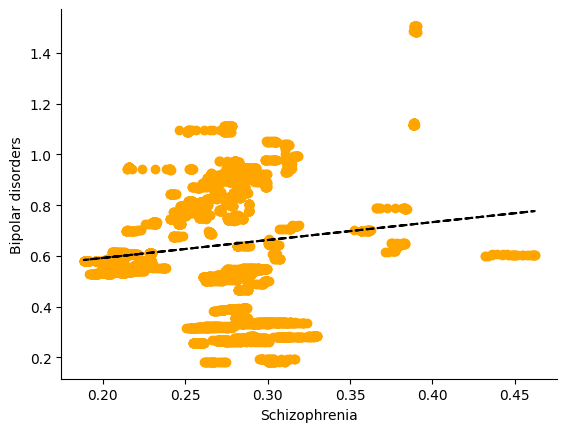



Coeficiente de correlación:  0.8401
0.8401 es muy cercano a 1, por lo que la relación entre las dos variables es fuerte. En la hipótesis, se podría 
entender que si una persona tiene esquizofrenia, es muy probable que la otra persona tenga un transtorno de bipolaridad.

Coeficiente de determinación:  0.7058
Indica que el 70.58% puede explicar la variabilidad de una variable en la otra.
Se podría decir que aproximadamente el 70.58% de la bipolaridad se explica por la presencia de esquizofrenia. 

intervalo de confianza  95%
 0.5569 < b1 <  0.8548 

No hay posibilidad de que b1 = 0 por lo que se rechaza la posibilidad
b0:  0.4506 



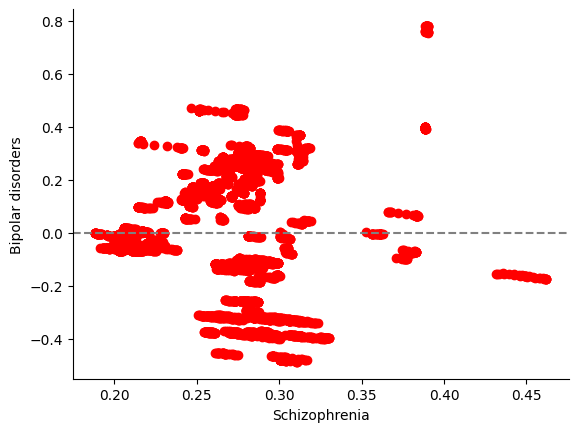



La linealidad no se cumple completamente porque los residuos no forman una linea.
La normalidad de los errores  puede darse por valores anormales.
La homoscedasticidad no se cumple completamente, ya que la dispersión de los residuos tiene mucha variabilidad.


In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/mental_health.csv")
df.dropna(inplace = True)

# Elige dos variables que creas que están relacionadas de la base de datos "mental health" e incluye en el reporte lo siguiente:
# Hipótesis de causalidad: Redacta una hipótesis sobre la causalidad entre las dos variables, a su vez, establece la variable dependiente y la variable independiente.
print ("H0: Si una persona tiene un diagnóstico de esquizofrenia, es probable que también presente trastorno bipolar \n")
X = df["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized"]
Y = df["Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized"]

# Recta de regresión ajustada: Realiza los cálculos necesarios para encontrar la recta de regresión ajustada. Incluye los procedimientos que te llevaron a la recta de regresión
# Gráfico de dispersión
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = "orange")
plt.xlabel("Schizophrenia")
plt.ylabel("Bipolar disorders")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1*X
Yc = fun(X)
plt.plot(X, Yc, color = "black", linestyle = "--")
plt.show()
print ("\n")

# Coeficiente de correlación y determinación: Realiza los cálculos necesarios para obtener la r de Pearson y el coeficiente de determinación. Incluye dichos cálculos
# Coeficiente de correlación
Sxx = np.sum((X-np.mean(X))**2)
Sxy = np.sum((Y - np.mean(Y))*(X - np.mean(X)))
Syy = np.sum((Y - np.mean(Y))**2)

r = Sxy / np.sqrt(Sxx * Sxy)
print(f"Coeficiente de correlación: {r: 0.4f}")
print("0.8401 es muy cercano a 1, por lo que la relación entre las dos variables es fuerte. En la hipótesis, se podría \nentender que si una persona tiene esquizofrenia, es muy probable que la otra persona tenga un transtorno de bipolaridad.\n")

# Coeficiente de determinación
print(f"Coeficiente de determinación: {r**2: 0.4f}")
print("Indica que el 70.58% puede explicar la variabilidad de una variable en la otra.\nSe podría decir que aproximadamente el 70.58% de la bipolaridad se explica por la presencia de esquizofrenia. \n")

# Calcula el intervalo de confianza del 95% para β_1 y β_0 ¿Qué dice el intervalo de confianza a la posibilidad de que β_1 sea igual a cero?
nivel_de_significancia = 0.05
from scipy.stats import t
df = pd.DataFrame(X)
T = t.ppf(1 - nivel_de_significancia /2,df = X.size - 2)
se_b1 = np.sqrt(np.sum((Y - Yc)**2) / (Y.size - 2)) / np.sqrt(Sxx)
confianza_b1 = b1 - T * se_b1, b1 + T * se_b1
print(f"intervalo de confianza {1 - nivel_de_significancia: 0.0%}")
print(f"{confianza_b1[0] : 0.4f} < b1 < {confianza_b1[1] : 0.4f} \n")
print("No hay posibilidad de que b1 = 0 por lo que se rechaza la posibilidad")
b0 = np.mean(Y) - b1 * np.mean(X)
print(f"b0: {b0: 0.4f} \n")

# Realiza el gráfico de los residuales: A partir de este gráfico, menciona si los datos cumplen con los supuestos para la regresión: linealidad, normalidad en torno a la recta, homoscedasticidad.
plt.figure()
residuales = Y - Yc
plt.scatter(X, residuales, color = "red")
plt.xlabel("Schizophrenia")
plt.ylabel("Bipolar disorders")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.axhline(y = 0, color = "gray", linestyle = "--")
plt.show()
print("\n")

print("La linealidad no se cumple completamente porque los residuos no forman una linea.")
print("La normalidad de los errores  puede darse por valores anormales.")
print("La homoscedasticidad no se cumple completamente, ya que la dispersión de los residuos tiene mucha variabilidad.")


